# **Weather Forecasting**

Importing some important utilities!

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-prediction/seattle-weather.csv


In [2]:
df=pd.read_csv("../input/weather-prediction/seattle-weather.csv")

Checking whether the dataset got imported to the notebook.

In [3]:
df.shape

(1461, 6)

In [4]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

There are no null values in the data set.

# Data Pre-Processing:
The column weather contains the data value in the string form and we need to predict the weather data so for that we need to process the data.

In [8]:
from sklearn.preprocessing import LabelEncoder

df['weather']=LabelEncoder().fit_transform(df['weather'])

# Data Visualization:

<AxesSubplot:>

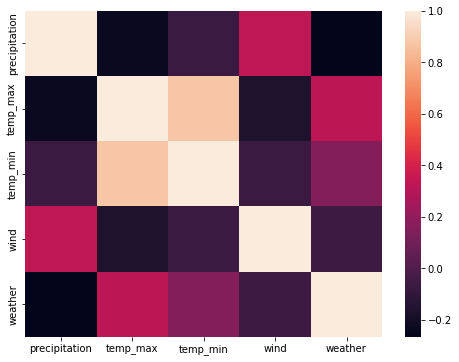

In [9]:
fig, axes=plt.subplots(figsize=(8, 6))
sns.heatmap(df.corr(), ax=axes)

We can observe that wind and preception are weakly co-related.temp_max and wind are negatively correlated means they move in the opposite direction.

# Machine Learning Model for Prediction of Weather...

In [10]:
from sklearn.model_selection import train_test_split
features=["precipitation", "temp_max", "temp_min", "wind"]
X=df[features]
y=df.weather
train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0)

# Decision Tree Regressor:

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

model1=DecisionTreeRegressor(random_state=1)
model1.fit(train_X, train_y)
pred1=model1.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred1)))

Mean Absolute Error: 0.713115


# Random Forest Regressor:

In [12]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor(random_state=1)
model2.fit(train_X, train_y)
pred2=model2.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred2)))
    

Mean Absolute Error: 0.694026


# Extreme Gradient Regressor:

In [13]:
from xgboost import XGBRegressor

model3= XGBRegressor(n_estimators=100, learning_rate=0.04)
model3.fit(train_X, train_y)
pred3=model3.predict(test_X)
print("Mean Absolute Error: %f" %(mean_absolute_error(test_y, pred3)))

Mean Absolute Error: 0.682803


The least mean absolute error we got is of the XGB Regressor Model. 